# Survival Analysis의 기본 개념


1. Event (사건) : 생존의 반대 개념입니다. 죽음, 사고, 장애 등 생존분석으로 분석하려는 대상입니다. 고객 이탈분석에서는 이탈이 바로 사건입니다.
2. Time (시간) : 말 그대로 (상대적) 시간입니다. 즉, 분석하려는 대상을 관찰하기 시작한 시점으로부터 경과한 시간입니다. 이탈분석에서는 비교적 명확한데, 각 고객의 가입 시점으로부터 경과한 시간입니다.
3. Censored (중도절단) : right censored와 left censored로 나뉩니다.
4. Right censored : 대상에 아직 사건이 발생하지 않았거나, 기타 다양한 이유로 관찰이 종료된 것을 의미합니다. 이탈분석에서는 아직 활동 중인 사용자나 잠시 활동이 뜸한 사용자가 해당합니다.
5. Left censored : 대상을 관찰하기 전에 사건이 발생했거나 기대했던 최소 기간보다 생존 기간이 더 짧았던 경우입니다. 이탈분석에서는 앱을 설치하자마자 삭제하는 Bouncing이 해당합니다.
6. Survival function (생존함수) : 고객이 특정 시간보다 더 오래 잔존할 확률을 계산하는 함수입니다.
7. Hazard function (위험함수) : 특정 시간 t에 고객이 이탈할 확률입니다. 즉, 대상이 t까지 잔존한 상태에서 t 시점에 이탈할 확률이죠.
8. Cumulative hazard function (누적위험함수) : 위험함수를 0부터 t까지 적분한 것입니다. 즉, t 시점 전까지 고객이 이탈 발생할 확률을 모두 더한 것이죠.

In [1]:
#!pip install lifelines

# Kaplan-Meier estimation

In [11]:
# 예제 데이터 생성
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
font_path ='C:/Windows/Fonts/NGULIM.TTF'
font = font_manager.FontProperties(fname =font_path).get_name()
rc('font', family =font)
data = pd.DataFrame(
    {
        'time': [1, 4, 7, 12, 14, 20, 26, 40, 45],
        'event': [True, True, True, False, True, False, True, False, False]
    },
    index = ['Alice', 'Bob', 'Charlie', 'Dan', 'Eve', 'Frank', 'Grace', 'Heidi', 'Ivan']
)
data

,time,event
Alice,1,True
Bob,4,True
Charlie,7,True
Dan,12,False
Eve,14,True
Frank,20,False
Grace,26,True
Heidi,40,False
Ivan,45,False


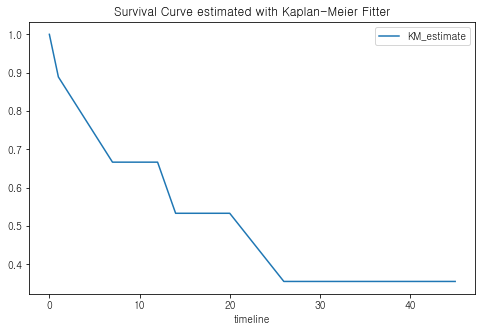

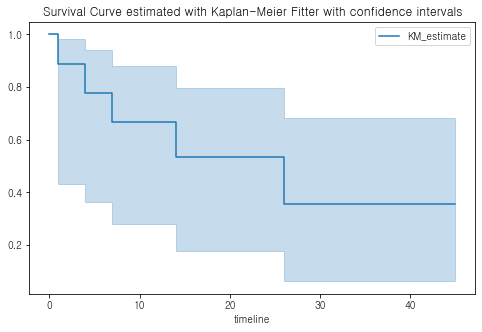

In [12]:
# Survival function 추정
from lifelines import KaplanMeierFitter
#KaplanMeierFitter에 alpha 값을 지정해 조절할 수 있습니다. 기본값은 0.05 (95%)입니다.
kmf = KaplanMeierFitter()
kmf.fit(durations = data['time'], event_observed = data['event'] )

kmf.survival_function_.plot(figsize=(8,5))
plt.title('Survival Curve estimated with Kaplan-Meier Fitter')
plt.show()

kmf.plot_survival_function(figsize=(8,5))
plt.title('Survival Curve estimated with Kaplan-Meier Fitter with confidence intervals')
plt.show()

<AxesSubplot:xlabel='time (days)', ylabel='cumulative hazard function, $\\hat{Λ}(t)$'>

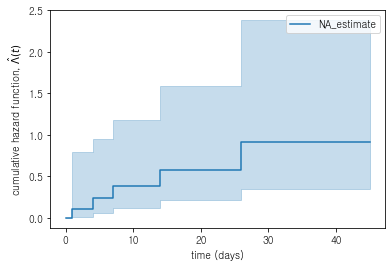

In [13]:
# Cumulative hazard function 추정
# 누적위험함수를 추정해 봅시다. Nelson-Aalen estimator 사용
from lifelines import NelsonAalenFitter
naf = NelsonAalenFitter()
naf.fit(data["time"], data["event"])

plot = naf.plot_cumulative_hazard()
plot.set_xlabel('time (days)')
plot.set_ylabel('cumulative hazard function, $\hat{Λ}(t)$')
plot
# 누적위험함수는 생존함수와 반대로 시간이 갈수록 증가합니다. 물론 시간이 갈수록 이탈위험이 늘어나는 것은 아닙니다. 이탈자가 누적되기 때문입니다.

In [14]:
# 효과분석
# 예제 데이터 생성
# data_A는 실험군 data_B는 대조군으로 프로모션을 진행했을때 고객 이탈 방지에 효과가 있는지 검정하는 것
data_A = pd.DataFrame(
    {
        'time': [2, 4, 9, 12, 19, 23, 26, 41, 48],
        'event': [True, True, False, False, False, True, True, False, False]
    },
    index = ['Alice_A', 'Bob_A', 'Charlie_A', 'Dan_A', 'Eve_A', 'Frank_A', 'Grace_A', 'Heidi_A', 'Ivan_A']
)

data_B = pd.DataFrame(
    {
        'time': [1, 4, 7, 12, 14, 20, 26, 40, 45],
        'event': [True, True, True, False, True, False, True, False, False]
    },
    index = ['Alice_B', 'Bob_B', 'Charlie_B', 'Dan_B', 'Eve_B', 'Frank_B', 'Grace_B', 'Heidi_B', 'Ivan_B']
)

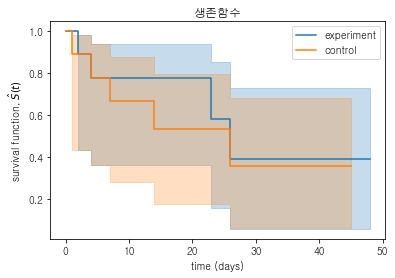

In [16]:
# 생존함수 시각화
plt.title("생존함수")
kmf = KaplanMeierFitter()
kmf.fit(data_A["time"], data_A["event"], label="experiment")
ax_kmf = kmf.plot()
kmf.fit(data_B["time"], data_B["event"], label="control")
ax_kmf = kmf.plot(ax=ax_kmf)

ax_kmf.set_xlabel('time (days)')
ax_kmf.set_ylabel('survival function, $\hat{S}(t)$')
ax_kmf

plt.show()

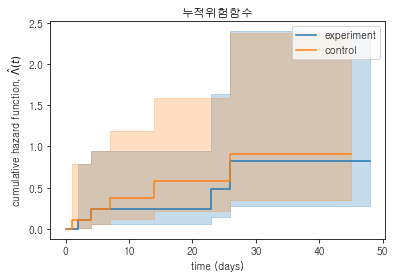

In [17]:
# 누적위험함수
plt.title('누적위험함수')

naf = NelsonAalenFitter()
naf.fit(data_A["time"], data_A["event"], label="experiment")
ax_naf = naf.plot()
naf.fit(data_B["time"], data_B["event"], label="control")
ax_naf = naf.plot(ax=ax_naf)

ax_naf.set_xlabel('time (days)')
ax_naf.set_ylabel('cumulative hazard function, $\hat{Λ}(t)$')
ax_naf

plt.show()

육안으로 봤을 땐 실험군 대상으로 진행한 프로모션이 효과가 있는듯 보입니다. 생존함숫값이 상승했고, 위험함숫값이 감소했죠. 하지만 95% 신뢰구간이 상당히 겹치므로 프로모션이 정말 고객이탈을 유의미하게 줄였는지 알아봐야 합니다. 생존분석에서는 Logrank test를 사용해 유의성을 검증합니다.

In [20]:
#유의성 검증
#Logrank test는 생존함수 분포를 비교하고 유의한 차이가 있는지 알아보는 가설 검정 기법입니다. Mantel-Cox test라고도 합니다. 파이썬에서는 다음과 같이 Logrank test를 실행할 수 있습니다.

from lifelines.statistics import logrank_test
logrank_test(data_A["time"], data_B["time"], data_A["event"], data_B["event"])

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.17 0.68      0.56

In [10]:
logrank_test(data_A["time"], data_B["time"], data_A["event"], data_B["event"]).p_value


0.6791912509835747

longrank_test로 확인한 결과 p-value가 0.05보다 크므로 귀무가설을 기각할 수 없다. 즉, 프로모션 효과는 없다.

## 예제

### 시간별/ 제조사별 불량률 데이터로 생존분석하여 25, 30, 35 개월 후 불량률을 계산하라

In [21]:
data = pd.DataFrame({'Time': [10, 15, 20, 25, 30, 35, 40, 45, 50],
                     'Failure': [0, 0, 1, 1, 0, 1, 0, 0, 1],
                     'Manufacturer': ['A', 'B', 'B', 'A', 'B', 'A', 'A', 'B', 'A']})
data

,Time,Failure,Manufacturer
0,10,0,A
1,15,0,B
2,20,1,B
3,25,1,A
4,30,0,B
5,35,1,A
6,40,0,A
7,45,0,B
8,50,1,A


In [22]:
# 생존함수
kmf = KaplanMeierFitter()
kmf.fit(data['Time'], event_observed=data['Failure'])

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 9 total observations, 5 right-censored observations>

In [24]:
# 생존함수 및 불량률 계산
survival_prob_25 = kmf.predict(25)
survival_prob_30 = kmf.predict(30)
survival_prob_35 = kmf.predict(35)

failure_rate_25 = 1 - survival_prob_25
failure_rate_30 = 1 - survival_prob_30
failure_rate_35 = 1 - survival_prob_35
print('25개월 생존확률: ', survival_prob_25, '25개월 후 불량확률:', failure_rate_25)
print('30개월 생존확률: ', survival_prob_30, '30개월 후 불량확률:', failure_rate_30)
print('35개월 생존확률: ', survival_prob_35, '35개월 후 불량확률:', failure_rate_35)


25개월 생존확률:  0.7142857142857143 25개월 후 불량확률: 0.2857142857142857
30개월 생존확률:  0.7142857142857143 30개월 후 불량확률: 0.2857142857142857
35개월 생존확률:  0.5357142857142858 35개월 후 불량확률: 0.4642857142857142
